# Clase 16: Clasificación 2

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

## Clasificación

El problema de clasificación consiste en **asignar categorías a observaciones.**


### Framework:

1. **Entrenar** un algoritmo de clasificación.
2. **Evaluar** en un dataset de validación.


El modelo construido debe **generalizar**, es decir, debe ser capaz de realizar predicciones correctas en datos distintos a los datos de entrenamiento.


Lo más importante es la **capacidad predictiva** del modelo.
Otros factores importantes: interpretabilidad, eficiencia.
    
### ¿Cómo saber si un modelo es bueno o no?

Resumimos la capacidad predictiva de un modelo mediante **métricas de desempeño** (performance metrics).
Las métricas se calculan contrastando los valores predichos versus los valores reales de la variable objetivo (con datos no usados durante entrenamiento)

## Nuestro problema de hoy: Pingüinos  🐧


Origen del dataset:

**Palmer Archipelago (Antarctica) penguin data**: 

*Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.*

https://github.com/allisonhorst/palmerpenguins

![Pinguinos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)



### Atributos
 
- `culmen_length_mm`: Largo del culmen (vértice o borde superior de la mandíbula)  (mm).
- `culmen_depth_mm`: Alto del culmen (vértice o borde superior de la mandíbula) (mm).
- `flipper_length_mm`: Longitud de las aletas (mm).
- `body_mass_g`: Masa corporal (g).
- `island`: Isla de origen (Dream, Torgersen, or Biscoe) en el archipiélago de Palmer (Antarctica).
- `sex`: Sexo del pinguino.

![Detalle Variables](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)
    
<center>Créditos a Allison Horst por sus excelentes ilustraciones https://github.com/allisonhorst </center>    
    
    
### Variable a predecir

- `species`: Especie del pinguino (Chinstrap, Adélie, or Gentoo)

In [159]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("./resources/penguins.csv").dropna().reset_index(drop=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [160]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

features = df.drop(columns=["species"])
labels = df.loc[:, "species"]

In [161]:
enc = OneHotEncoder(sparse=False)
categorical_features = features.loc[:, ["island", "sex"]]

enc.fit(categorical_features)
# Podemos acceder a los nombre de las columnas con enc.categories_
enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['.', 'FEMALE', 'MALE'], dtype=object)]

In [162]:
onehot_encoding = pd.DataFrame(
    enc.transform(categorical_features), columns=np.array(enc.categories_).flatten(),
).drop(columns=["."])

onehot_encoding

,Biscoe,Dream,Torgersen,FEMALE,MALE
0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
329,1.0,0.0,0.0,1.0,0.0
330,1.0,0.0,0.0,1.0,0.0
331,1.0,0.0,0.0,0.0,1.0
332,1.0,0.0,0.0,1.0,0.0


In [163]:
numerical_cols = [
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]

numerical_features = df.loc[:, numerical_cols]

scaler = RobustScaler()

numerical_features_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_features), columns=numerical_cols
)
numerical_features_scaled.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.595041,0.451613,-0.695652,-0.241206
1,-0.550964,0.032258,-0.478261,-0.201005
2,-0.462810,0.225806,-0.086957,-0.643216


In [164]:
features_final = pd.concat([numerical_features_scaled, onehot_encoding], axis=1)
features_final

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE
0,-0.595041,0.451613,-0.695652,-0.241206,0.0,0.0,1.0,0.0,1.0
1,-0.550964,0.032258,-0.478261,-0.201005,0.0,0.0,1.0,1.0,0.0
2,-0.462810,0.225806,-0.086957,-0.643216,0.0,0.0,1.0,1.0,0.0
3,-0.859504,0.645161,-0.173913,-0.482412,0.0,0.0,1.0,1.0,0.0
4,-0.573003,1.064516,-0.304348,-0.321608,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
329,0.297521,-1.161290,0.739130,0.703518,1.0,0.0,0.0,1.0,0.0
330,0.253444,-0.967742,0.782609,0.643216,1.0,0.0,0.0,1.0,0.0
331,0.650138,-0.516129,1.086957,1.366834,1.0,0.0,0.0,0.0,1.0
332,0.077135,-0.806452,0.652174,0.924623,1.0,0.0,0.0,1.0,0.0


In [165]:
# Holdout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_final, labels, test_size=0.33, shuffle=True, stratify=labels
)

---

## Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier(criterion="entropy")
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [167]:
print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión

 [[48  0  0]
 [ 2 21  0]
 [ 0  0 40]] 

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        40

    accuracy                           0.98       111
   macro avg       0.99      0.97      0.98       111
weighted avg       0.98      0.98      0.98       111



------------------------

## K-nearest neighbors (KNN)


K-nearest neighbors o k-vecinos más cercanos.

- Calcula una distancia entre la observación a predecir y sus vecinos mas cercanos.
- Es *lazy learner*, es decir, calcula las distancias cuando se ejecuta la clasificación.



- Funcionamiento :
    - Cuando $k = 1$, clasifico como la clase de la observación más cercana.
    - Cuando $k > 1$, hago una votación. La clase con mas votos (o sea, con mas vecinos) es la clase que retornaré.
    - Cuando quiero probabilidades, retorno la frecuencia relativa de cada clase.


- Al igual que el anterior, sus resultados se pueden **interpretar** según las reglas anteriores.


![KNN](./resources/knn.png)


- Para atributos numéricos, usamos distancias, como la euclideana (pero no limitada a esta).

$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$


- Es importante que los datos estén **escalados**.


Veamos a nuestros pingüinos (disclaimer, solo funciona con la clase azul el ejemplo) 



In [168]:
import plotly.express as px
import plotly.graph_objects as go
from umap import UMAP

reducer = UMAP()

projections = reducer.fit_transform(X_train)

In [169]:
projections = pd.DataFrame(projections, columns=["x", "y"], index=X_train.index)
projections["color"] = y_train

In [171]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'Biscoe', 'Dream', 'Torgersen', 'FEMALE', 'MALE'],
      dtype='object')

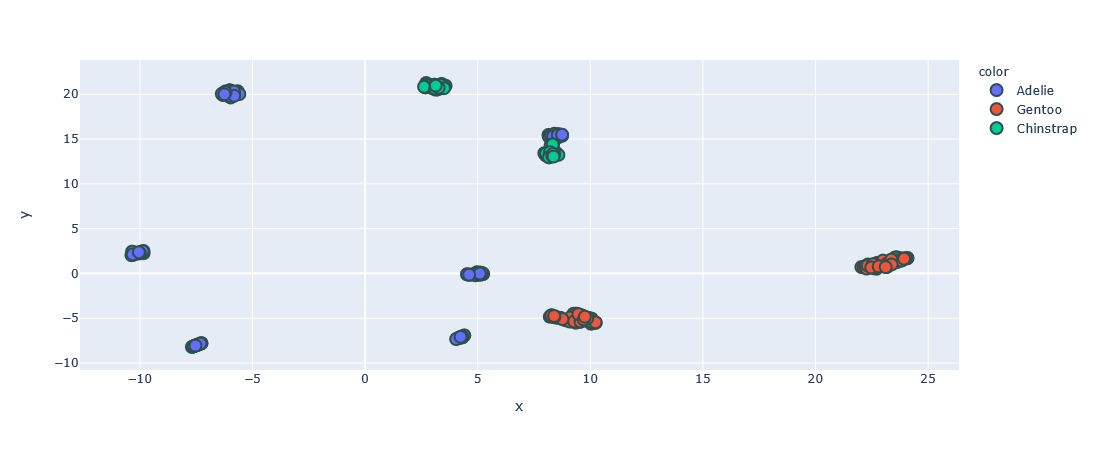

In [173]:
fig = px.scatter(projections, x="x", y="y", color='color')

fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)

> **Pregunta**: ¿Qué tan importante creen que es escalar los datos antes de usarlos?


La diferencia entre el peso y las otras variables es gigantezca!!

In [174]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [176]:
import numpy as np

euclidean_dist = lambda a, b: np.linalg.norm(a - b)

# Distancia entre el míniu
print(
    "Distancia entre el mínimo culmen_length_mm y body_mass_g promedio",
    euclidean_dist(32.1, 4209),
)

Distancia entre el mínimo culmen_length_mm y body_mass_g promedio 4176.9


In [15]:
print(
    "Distancia entre el máximo culmen_length_mm y body_mass_g promedio",
    euclidean_dist(59, 4209),
)

Distancia entre el máximo culmen_length_mm y body_mass_g promedio 4150.0


In [16]:
print(
    "Distancia entre el mínimo culmen_length_mm y body_mass_g máximo",
    euclidean_dist(32.1, 6300),
)
print(
    "Distancia entre el máximo culmen_length_mm y body_mass_g máximo",
    euclidean_dist(59, 6300),
)

Distancia entre el mínimo culmen_length_mm y body_mass_g máximo 6267.9
Distancia entre el máximo culmen_length_mm y body_mass_g máximo 6241.0


### Clasificamos y evaluamos


Problema: ¿cómo elegir $k$?

Si k es:
- Muy pequeño, el clf es suceptible al ruido.
- Muy grande, puede incluir muchos elementos de otra clase.


In [178]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [179]:
y_pred = neigh.predict(X_test)

In [180]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        48
   Chinstrap       1.00      1.00      1.00        23
      Gentoo       1.00      1.00      1.00        40

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



#### Buscando los K-NN de algún ejemplo aleatorio

Extraigamos una observación cualquiera


In [182]:
sample = X_test.sample(1)
sample

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE
23,-0.727273,0.419355,-1.086957,-0.723618,1.0,0.0,0.0,1.0,0.0


Veamos su clase original


In [183]:
indice = sample.index.values.flatten()
y_test[indice]

23    Adelie
Name: species, dtype: object

Y la clase predicha:

In [184]:
neigh.predict(sample)

array(['Adelie'], dtype=object)

**Veamos sus 10 vecinos mas cercanos**

O sea, las 10 observaciones mas parecidas según la métrica que estamos usando.

In [185]:
distances, neighbors_found = neigh.kneighbors(sample, 10, True)

print(
    "Indices de los vecinos mas cercanos encontrados:\n",
    neighbors_found,
    "\n\nDistancias:",
    distances,
)

Indices de los vecinos mas cercanos encontrados:
 [[112  48  41 198   3  89  62  74 205 131]] 

Distancias: [[0.7543734  0.7693138  0.79505676 0.80705127 0.82399552 0.88876516
  0.90761411 0.95156137 0.97923097 1.24098168]]


Exploremos los vecinos que encontró


In [186]:
projections_with_knn = projections.copy()
knn_color = []
for idx, row in projections_with_knn.reset_index().iterrows():
    knn_color.append("Vecino" if idx in neighbors_found.flatten() else row["color"])
projections_with_knn["knn_color"] = knn_color

Transformamos el ejemplo de prueba al espacio de proyecciones para agregarlo a la visualización

In [187]:
sample_reduced = reducer.transform(sample)

sample_to_plot = pd.DataFrame(sample_reduced, columns=["x", "y"])
sample_to_plot["knn_color"] = "Ejemplo"

In [188]:
df_to_plot = pd.concat([projections_with_knn, sample_to_plot])

En la siguiente visualización podemos observar el ejemplo y cuales eran sus vecinos más cercanos

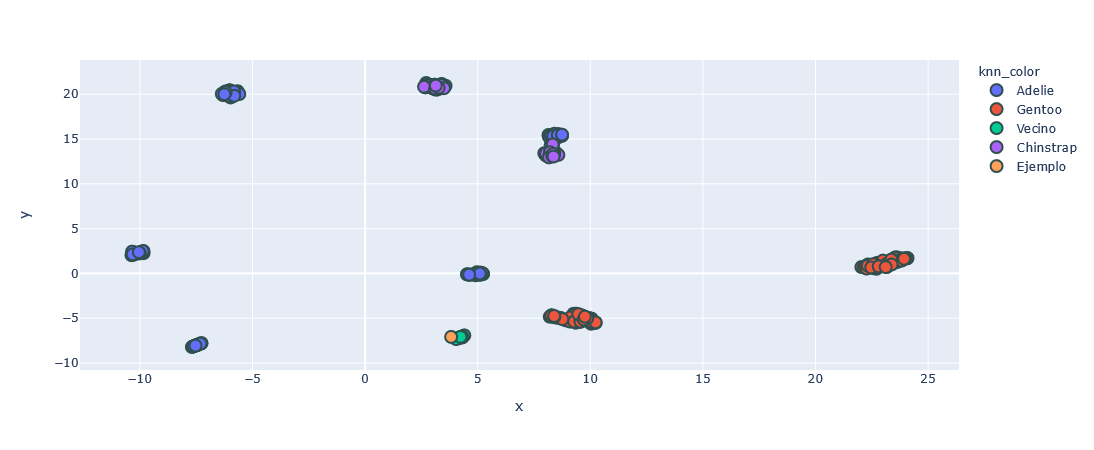

In [189]:
fig = px.scatter(df_to_plot, x="x", y="y", color="knn_color")
fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)

In [190]:
pd.concat([y_train, X_train], axis=1).iloc[neighbors_found.flatten()]

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE
44,Adelie,-0.539945,0.129032,-0.478261,-0.442211,1.0,0.0,0.0,1.0,0.0
58,Adelie,-0.892562,-0.064516,-0.565217,-0.964824,1.0,0.0,0.0,1.0,0.0
48,Adelie,-1.101928,0.258065,-0.434783,-0.924623,1.0,0.0,0.0,1.0,0.0
52,Adelie,-0.881543,-0.225806,-0.695652,-0.964824,1.0,0.0,0.0,1.0,0.0
54,Adelie,-0.969697,-0.129032,-0.521739,-0.723618,1.0,0.0,0.0,1.0,0.0
20,Adelie,-1.013774,0.516129,-0.434783,-0.201005,1.0,0.0,0.0,1.0,0.0
46,Adelie,-1.046832,0.193548,-0.304348,-0.482412,1.0,0.0,0.0,1.0,0.0
17,Adelie,-0.947658,0.612903,-0.347826,-0.201005,1.0,0.0,0.0,1.0,0.0
106,Adelie,-0.528926,0.129032,-0.173913,-0.683417,1.0,0.0,0.0,1.0,0.0
108,Adelie,-0.539945,1.096774,-0.260870,-0.120603,1.0,0.0,0.0,1.0,0.0


### Resumen KNN

| Ventajas                           | Deseventajas                                                                        |
|------------------------------------|-------------------------------------------------------------------------------------|
| Modelo no paramétrico              | Los datos tienen que ser escalados antes de ejecutarlo.                             |
| Muy simple y facil de interpretar. | Costoso: almacena todos los datos de entrenamiento.                                 |
| Robusto a outliers.                | Las distancias las calcula de forma lazy: es decir, cuando se ejecuta la predicción |
|                                    | No genera un modelo, solo almacena datos de entrenamiento. Por ende no generaliza.  |


---------------------

##  Naive Bayes


- Modela la relación probabilística entre atributos y clase.

- Asume la existencia de una probabilidad conjunta entre los atributos/datos y las clases.

- Supuesto muy fuerte (*Naive/Ingenuo*): Los atributos son independientes entre si.

- Es generativo. Es decir, clasifico en base a la probabilidad de que la distribución una la clase genere un dato.
   
   
- Ejemplo: 
   - Calculo la probabilidad de generar los atributos a partir de la distribución de
        - Adelie.
        - Chinstrap.
        - Gentoo.
   - Luego, me quedo con la clase que entrege la probabilidad máxima.
   
   


![Teorema de bayes aplicado a clasificación](./resources/bayes.jpeg)

<center>Créditos a Chris Albon: https://chrisalbon.com/about/chris_albon </center>

En general, se genera una distribución de probabilidad por cada atributo de cada clase. Así, el clasificador se puede resumir en la siguiente fórmula:

$$P(\text{x} | y) = p(y) \prod_{i=1}^{n} p(\text{x}_i  | y) $$

Noten que la distribución de probabilidad usada para cada atributo es un parámetro del clasificador. Scikit es un poco rígido y no da muchas alternativas a esto: solo puede usarse la distribución de probabilidad de la clase 


- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) : Asume que todas las features distribuyen de forma normal. Bueno para features numéricas.

- [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB): Asume que las features distribuyen de forma multinomial, la cual generaliza la distribución binomial (contar el número de caras al lanzar la moneda n veces) que opera sobre 2 clases a k clases (contar la probabilidad de que salga la k-cara de un dado de k caras n veces). Funciona muy bien para codificaciones de texto usando Bag of Words.

<center>
<img src='resources/bow.png' width=400 />
</center>

<center>Fuente: https://medium.com/swlh/spam-filtering-using-bag-of-words-aac778e1ee0b</center>

- [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB): Asume que las features distribuyen bajo Bernoulli. Muy bueno para variables categóricas codificadas usando OneHotEncoder.




Una explicación mucho más extensa y además con todas las variantes puede ser encontrada en https://scikit-learn.org/stable/modules/naive_bayes.html.


### Naive Bayes Gaussiana Sobre Pinguinos

In [196]:
adelie = df[df["species"] == "Adelie"]
chinstrap = df[df["species"] == "Chinstrap"]
gentoo = df[df["species"] == "Gentoo"]

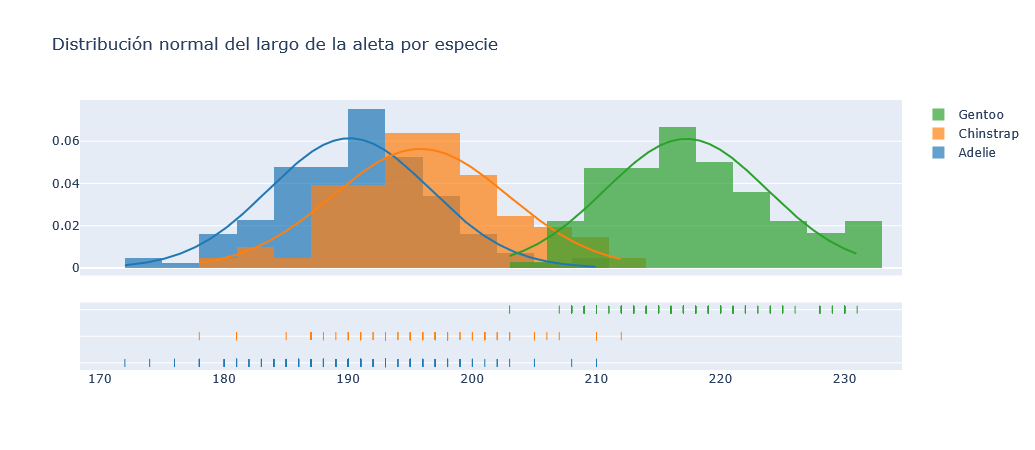

In [80]:
import plotly.figure_factory as ff

variable = "flipper_length_mm"

# Group data together
hist_data = [adelie[variable], chinstrap[variable], gentoo[variable]]

group_labels = ["Adelie", "Chinstrap", "Gentoo"]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, curve_type="normal", bin_size=3)
fig.update_layout(title_text="Distribución normal del largo de la aleta por especie")
fig.show()

In [ ]:
200 

0.02 -> Adelie
0.04 -> Chinstrap
0.00 -> Gentoo

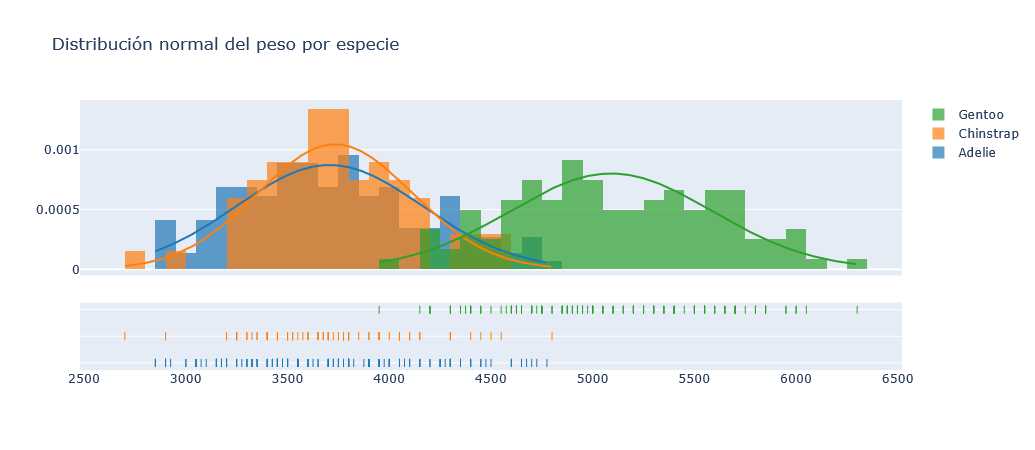

In [70]:
variable = "body_mass_g"

# Group data together
hist_data = [adelie[variable], chinstrap[variable], gentoo[variable]]

group_labels = ["Adelie", "Chinstrap", "Gentoo"]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, curve_type="normal", bin_size=100)
fig.update_layout(title_text="Distribución normal del peso por especie")
fig.show()

In [ ]:
4050

0.074 -> Chinstrap.
0.0639 -> Adelie.
0.00 -> Gentoo.

In [ ]:
0.02 -> Adelie
0.04 -> Chinstrap
0.00 -> Gentoo

In [191]:
0.074*0.02 

0.00148

In [193]:
0.0639*0.04

0.002556

In [192]:
0.00 * 0

0.0

In [194]:
0.00148 /(0.00148 + 0.002556)

0.3666997026759168

In [195]:
0.002556 /(0.00148 + 0.002556)

0.6333002973240833

### Crear y entrenar el modelo


Para esto, primero obtenemos solo las features numéricas y descartamos las categóricas.

In [197]:
X_train_only_numeric = X_train.drop(
    columns=["Biscoe", "Dream", "Torgersen", "FEMALE", "MALE"]
)
X_test_only_numeric = X_test.drop(
    columns=["Biscoe", "Dream", "Torgersen", "FEMALE", "MALE"]
)

In [200]:
X_train_only_numeric.head(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
11,-0.639118,0.548387,-0.086957,-0.482412
281,0.683196,-0.741935,1.130435,1.206030


In [199]:
from sklearn.naive_bayes import GaussianNB

# Creamos el modelo
gnb = GaussianNB()

# Entrenamos
gnb.fit(X_train_only_numeric, y_train)

# Predecimos
y_pred = gnb.predict(X_test_only_numeric)

# Evaluamos
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Matriz de confusión
 [[46  4  0]
 [ 2 19  0]
 [ 0  0 40]]
              precision    recall  f1-score   support

      Adelie       0.96      0.92      0.94        50
   Chinstrap       0.83      0.90      0.86        21
      Gentoo       1.00      1.00      1.00        40

    accuracy                           0.95       111
   macro avg       0.93      0.94      0.93       111
weighted avg       0.95      0.95      0.95       111



In [93]:
gnb.theta_  # promedios de cada feature por clase

array([[-0.64170462,  0.32192232, -0.30390417, -0.27545893],
       [ 0.49758188,  0.40716846, -0.0531401 , -0.24254606],
       [ 0.31873278, -0.77903226,  0.84728261,  0.78442211]])

In [203]:
pd.DataFrame(gnb.theta_ , columns=X_train_only_numeric.columns, index=['Adelie', 'Chinstrap', 'Gentoo'])

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
Adelie,-0.624051,0.332785,-0.293256,-0.258640
Chinstrap,0.509091,0.391398,0.019324,-0.185818
Gentoo,0.288567,-0.758871,0.840217,0.802513


In [94]:
promedio_aleta_adelie = gnb.theta_[0][2]
promedio_aleta_adelie  # verifiquemos este valor con lo que vimos arriba.

-0.3039041703637977

> **Pregunta:** ¿Qué sucederá si agregamos las variables categóricas?

In [204]:
# Creamos el modelo
gnb = GaussianNB()

# Entrenamos
gnb.fit(X_train, y_train)

# Predecimos
y_pred = gnb.predict(X_test)

# Evaluamos
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Matriz de confusión
 [[18  0  0]
 [16 23  0]
 [14  0 40]]
              precision    recall  f1-score   support

      Adelie       0.38      1.00      0.55        18
   Chinstrap       1.00      0.59      0.74        39
      Gentoo       1.00      0.74      0.85        54

    accuracy                           0.73       111
   macro avg       0.79      0.78      0.71       111
weighted avg       0.90      0.73      0.76       111



### Predicción usando solo variables categóricas OneHot

In [205]:
from sklearn.naive_bayes import BernoulliNB

X_train_only_cat = X_train.loc[:, ["Biscoe", "Dream", "Torgersen", "FEMALE", "MALE"]]
X_test_only_cat = X_test.loc[:, ["Biscoe", "Dream", "Torgersen", "FEMALE", "MALE"]]


# Creamos el modelo
bnb = BernoulliNB()

# Entrenamos
bnb.fit(X_train_only_cat, y_train)

# Predecimos
y_pred = bnb.predict(X_test_only_cat)

# Evaluamos
print("Matriz de confusión\n", confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Matriz de confusión
 [[16  0  0]
 [16 23  0]
 [16  0 40]]
              precision    recall  f1-score   support

      Adelie       0.33      1.00      0.50        16
   Chinstrap       1.00      0.59      0.74        39
      Gentoo       1.00      0.71      0.83        56

    accuracy                           0.71       111
   macro avg       0.78      0.77      0.69       111
weighted avg       0.90      0.71      0.75       111



### Resumen Naive Bayes

| Ventajas                                           | Deseventajas                                                                  |
|----------------------------------------------------|-------------------------------------------------------------------------------|
| Clasificación y entrenamiento muy rápido en base a conteos.          | Asunción de independencia entre atributos, lo que en general nunca es cierto. |
| Interpretabilidad de las distribuciones de clases. |                                                                               |
| Robusto a datos faltantes en el entrenamiento.     |                                                                               |

## Support Vector Machines

Support Vector Machines son una familia de clasificadores enfocados en encontrar hiperplanos (**decision boundaries**) que separan los datos.

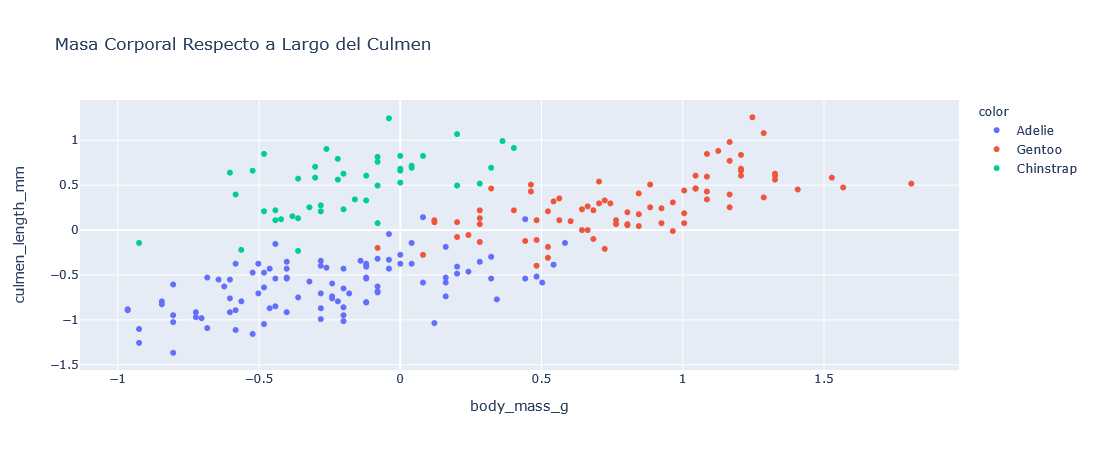

In [207]:
px.scatter(
    X_train,
    x="body_mass_g",
    y="culmen_length_mm",
    color=y_train,
    title="Masa Corporal Respecto a Largo del Culmen",
)

### Hiperplanos y Márgenes

Existen infinitos hiperplanos que separan a nuestros datos. La idea del clasificador es que no solo encuentre un Decision Boundary sino que además encuentre el que tenga **mayor margen**.

![Hiperplanos posibles](./resources/svm_hiperplanos.png)

Que tengan un margen más ancho nos permite separar mejor las clases y por ende, ante nuevos datos, poder generalizar mejor.


> Entre mayor ancho de margen, mayor poder de generalización

Entonces, podemos resumir un clasificador **SVM lineal como un problema de optimización para encontrar el hiperplano con mayor margen** (que mejor separe las clases).

### Entrenando SVM

<center>
    <img src='./resources/svm_margin.png' width=500 />
</center>

Entrenar SVM equivale a maximizar el tamaño del margen. Es decir, a encontrar $w$.
Esto se puede hacer a través de la resolución de un problema de optimización a través de los multiplicadores de Lagrange.

El resolver este problema implica encontrar **Vectores de Soporte**. Estos vectores son los puntos que se encuentran sobre los márgenes y que permiten definir el decision boundary.

### Función de clasificación entrenada


Una vez entrenado nuestro SVM (es decir, encontrado el hiperplano), este clasificará cada observación según la siguiente función:

$$f(z) = \text{sign}(w\cdot z + b)$$

### Soft Margins

<center>
    <img src='./resources/svm_holgura.png' width=500>
</center>

Noten que no siempre es bueno maximizar el margen. La imagen anterior muestra que es bueno "relajar" un poco el problema de optimización permitiendo errores (que pueden representar ruido) para obtener una mejor clasificación. En scikit, esto se logra a través del parámetro `C`

### Tipos de Problema que Puede Resolver.


#### Kernel Trick

El clasificador hasta el momento no es capaz de separar datos linealmente no separables (es decir, no podemos separarlos bien con un hiperplano entre ellos).
SVM implementa el Kernel Trick.

<center>
    <img src='./resources/kernel_trick.png' >
    
    Fuente: https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d
</center>
         


#### Clasificación Multiclase 

Como habrán visto, este clasificador solo puede resolver problemas binarios. Una posible solución es usar un mecanismo `One-vs-all`. Es decir, por cada clase crear un clasificador que considere 2 clases: la propia vs todo el resto. 
Luego, la clase está dada como la clasificación con mayor distancia al margen.



### SVM en Pinguinos

El objetivo de este claisifcador aplicado a los pinguinos será encontrar hiperplanos que separen los pinguinos. Para esto, solo usaremos `body_mass_g` y `culmen_length_mm`. Como solo usaremos 2 atributos, encontraremos solo rectas y no hiperplanos que separen estas dimensiones.

Extraemos solo las variables anteriormente dichas

In [208]:
from sklearn.preprocessing import LabelEncoder

X = X_train.loc[:, ["body_mass_g", "culmen_length_mm"]].values
y = LabelEncoder().fit_transform(y_train.values)

Graficamos las distintas variantes de SVM

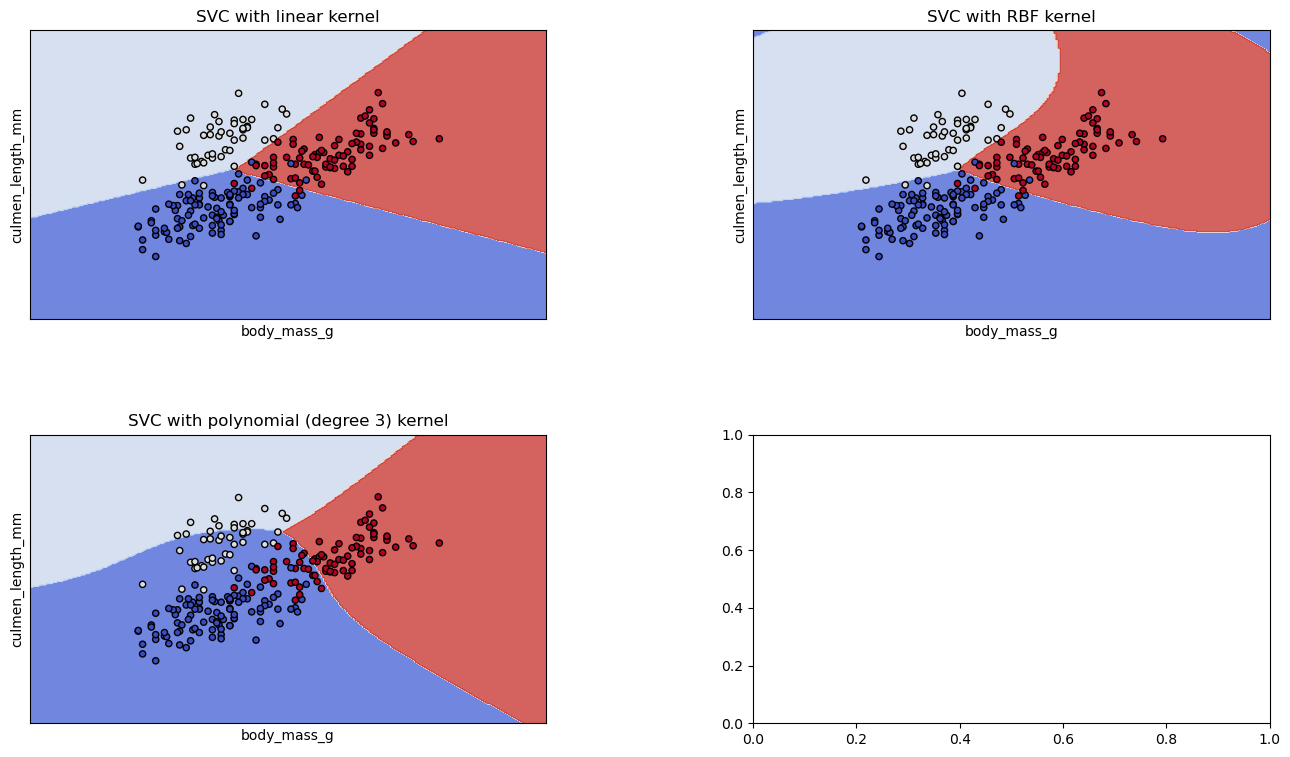

In [209]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("body_mass_g")
    ax.set_ylabel("culmen_length_mm")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

fig.set_size_inches(16, 9)

plt.show()

In [210]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [211]:
y_pred = svm.predict(X_test)

In [213]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        49
   Chinstrap       0.96      1.00      0.98        22
      Gentoo       1.00      1.00      1.00        40

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

